# Bramki Jednokubitowe

## Konstrukcja obwodów kwantowych w Pennylane

Na ostatnich zajęciach wyprodukowaliśmy klasyczną i kwantową sieć neuronową realizowaną w bibliotece PyTorch i Pennylane. 


Kod naszej wartwy ukrytej w której użyliśmy obwodu kwantowego realizował następujące obiekty i funkcje:
```python

import pennylane as qml

n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
```

Na tych zajęciach nauczymy się tworzyć proste obwody kwantowe. 

Zaczynamy!


Obwody kwantowe składają się z rejestrów, które reprezentują poszczególne kubity.

![](../img/kubity1.png)

Domyślnie kubity inicjalizujemy w stanie 0.

![](../img/kubity2.png)


Liczbę rejestrów możesz ustalić parametrem `wires` przy definicji środowiska wykonawczego `device`. 

```python
dev = qml.device("default.qubit", wires=1)
```


Operacje wykonywane na kubitach nazywamy bramkami. 
Operacje te można wykonywać na jednym albo i wielu kubitach na raz. 
Domyślnie będziemy optymalizować algortymy aby składały się z jak najmniejszej ilości bramek działających na dużą liczbę kubitów. 


Graficznie można rozumieć realizację algorytmu jako stosowanie bramek na poszczególnych kubitach.

![kibu2](../img/obwod1.png)



W bibliotece PennyLane, `obwody kwantowe` reprezentowane są przez `kwantowe funkcje`, realizowane przez klasyczne funkcje w pythonie. 

Schemat kodu penny lane możemy zapisać jako: 

```python
import pennylane as qml

def my_quantum_function(params):

    # Single-qubit operations with no input parameters
    qml.Gate1(wires=0)
    qml.Gate2(wires=1)

    # A single-qubit operation with an input parameter
    qml.Gate3(params[0], wires=0)

    # Two-qubit operation with no input parameter on wires 0 and 1
    qml.TwoQubitGate1(wires=[0, 1])

    # Two-qubit operation with an input parameter on wires 0 and 1
    qml.TwoQubitGate2(params[1], wires=[0, 1])

    # Return the result of a measurement
    return qml.Measurement(wires=[0, 1])
```

Przykładowo

![](../img/przyklad1.png)


```python

def my_first_circuit(theta):

    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
    qml.RZ(theta, wires = 0)

    return qml.probs(wires = [0,1])
```

![](../img/pennylane1.png)


Matematycznie całość możemy zapisać jako: 

![](../img/stanpennylane.png)

In [1]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=2)
#dev = qml.device("default.qubit", wires=2, shots=1000)

@qml.qnode(dev)
def circ(theta):
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
    qml.RZ(theta, wires = 0)
    return qml.state()
#    return qml.probs(wires = [0,1])

circ(np.pi)

tensor([4.32978028e-17-0.70710678j, 0.00000000e+00+0.j        ,
        0.00000000e+00+0.j        , 4.32978028e-17+0.70710678j], requires_grad=True)

In [2]:
print(qml.draw(circ)(np.pi))

0: ──H─╭●──RZ(3.14)─┤  State
1: ────╰X───────────┤  State


(<Figure size 600x300 with 1 Axes>, <Axes: >)

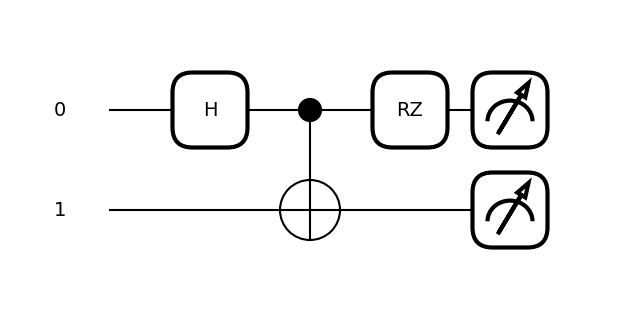

In [3]:
qml.draw_mpl(circ)(np.pi)

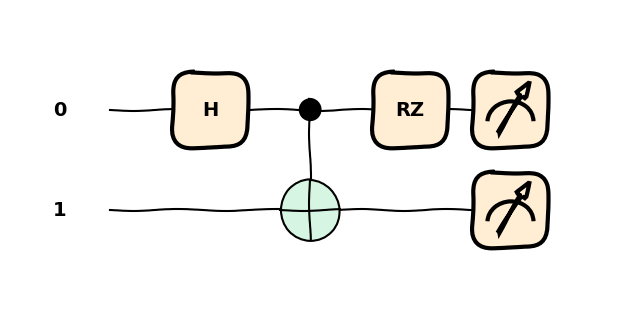

In [4]:
import matplotlib.pyplot as plt
qml.drawer.use_style("sketch")
fig, ax = qml.draw_mpl(circ)(np.pi)
plt.show()

Matplotlib is building the font cache; this may take a moment.


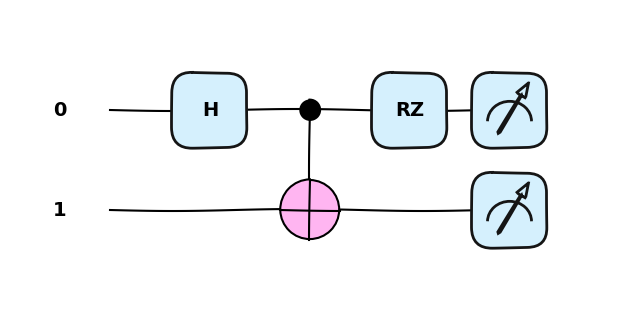

In [5]:
qml.drawer.use_style("pennylane_sketch")
fig, ax = qml.draw_mpl(circ)(np.pi)
plt.show()

### Obwody z jednym kubitem

$$
\ket{\psi}=\ket{0}
$$
Przedstawmy obwód kwantowy z jednym kubitem. Funkcja kwantowa zwraca nam stan kubitu po realizacji obwodu.

1. Obwód z jednym kubitem bez bramek.

In [6]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    return qml.state()

In [7]:
qc()

tensor([1.+0.j, 0.+0.j], requires_grad=True)

wektor $[1,0]$ można interpretować jako stan $\ket{0}$ czyli jako wartość bitu $0$.

Natomiast wykorzystując metodę `qml.probs()` możesz zwrócić kwadraty amplitud czyli prawdopodobieństow otrzymania 0 i 1. 


In [2]:
import pennylane as qml

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def qc2():
    return qml.probs(wires=0)

qc2()

tensor([1., 0.], requires_grad=True)

2. Zobaczmy jak zainicjalozować stan $\ket{1}= [0,1]^T$
$$
\ket{\psi}=\ket{1}
$$

In [4]:
from pennylane import numpy as np
from pennylane.ops import StatePrep

stan = np.array([0,1]) # stan do inicjalizacji

@qml.qnode(dev)
def qc():
    StatePrep(stan, wires=0)
    return qml.state()

qc()

tensor([0.+0.j, 1.+0.j], requires_grad=True)

In [5]:
@qml.qnode(dev)
def qc():
    StatePrep(stan, wires=0)
    return qml.probs()

qc()

tensor([0., 1.], requires_grad=True)

3. utwórzmy pełną superpozycję stanu 0 i 1. 
$$
\ket{\psi}=\frac{1}{\sqrt{2}} (\ket{0} + \ket{1} ) 
$$

In [ ]:
stan = np.array([1/np.sqrt(2), 1/np.sqrt(2)])

@qml.qnode(dev)
def qc_s():
    qml.StatePrep(stan,wires=0)
    return qml.state()

print(f"amplitudy: {qc_s()}")


@qml.qnode(dev)
def qc_p():
    qml.StatePrep(stan,wires=0)
    return qml.probs()

print(f"prwadopodobieństwa: {qc_p()}")

print(f"test czy amp^2 = prawdopodobienstwo: {qc_s()**2 == qc_p()}")

amplitudy: [0.70710678+0.j 0.70710678+0.j]
prwadopodobieństwa: [0.5 0.5]
test czy amp^2 = prawdopodobienstwo: [ True  True]


### Stany dwukubitowe

$$
\ket{\psi}=\ket{00}
$$
$$
\ket{\psi}=\ket{01}
$$
$$
\ket{\psi}=\ket{10}
$$
$$
\ket{\psi}=\ket{11}
$$

In [10]:
dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)
def qc():
    return qml.state()

qc()

tensor([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j], requires_grad=True)

$$
\ket{\psi}=\frac{1}{2}\left( \ket{00} + \ket{01} + \ket{10} + \ket{11} \right)
$$

In [11]:
dev = qml.device("default.qubit", wires=2)

stan = np.array([1/2, 1/2, 1/2, 1/2])

prawd = [i**2 for i in stan]
print(f"test: suma prawdopodobienst {np.sum(prawd)}")

@qml.qnode(dev)
def qc():
    StatePrep(stan, wires=[0,1])
    return qml.state()

qc()

test: suma prawdopodobienst 1.0


tensor([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j], requires_grad=True)

**ZADANIE** Napisz funkcję generującą stan jednego kubitu jako funkcję kąta $\theta$ 
```python
def stan_kubitu(theta):
    pass # Twoj kod 
```

> $\ket{\psi}= [\cos(\frac{\theta}{2}), \sin(\frac{\theta}{2})]$

Wygeneruj obwód z pojedynczym kubitem inicjalizujący stan $\ket{0}$ , $\ket{1}$ oraz  $\frac{1}{\sqrt{2}} (\ket{0} + \ket{1} )$

## Bramki jednokubitowe

### Bramka X

Bramka X-gate reprezentowana jest przez macierz Pauli-X : 

$$
X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}
$$


Bramka X obraca kubit w kierunku osi na sferze Bloch'a o $\pi$ radianów.
Zmienia $|0\rangle$ na $|1\rangle$ oraz $|1\rangle$ na $|0\rangle$.
Jest często nazywana kwantowym odpowiednikiem bramki NOT lub określana jako `bit-flip`.

$$ \sigma_x \ket{0} = \ket{1} \,\,\, \sigma_x\ket{1} = \ket{0} $$

In [12]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    qml.X(wires=0)
    return qml.state()

qc()

tensor([0.+0.j, 1.+0.j], requires_grad=True)

In [13]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    qml.PauliX(wires=0)
    return qml.state()

qc()

tensor([0.+0.j, 1.+0.j], requires_grad=True)

(<Figure size 400x200 with 1 Axes>, <Axes: >)

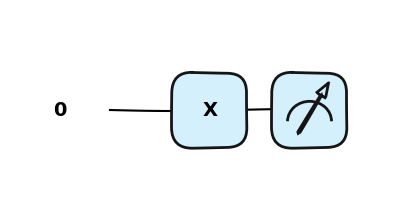

In [14]:
qml.draw_mpl(qc)()

tensor([1.+0.j, 0.+0.j], requires_grad=True)

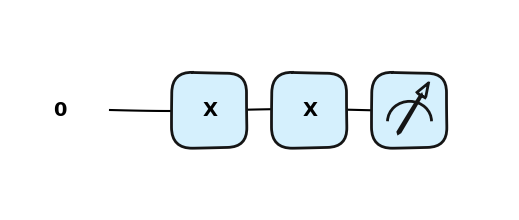

In [15]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    qml.PauliX(wires=0)
    qml.X(wires=0)
    return qml.state()

qml.draw_mpl(qc)()
qc()

> Jak bramka X działa na stan $\ket{+}$, $\ket{-}$ $\ket{i}$ i $\ket{-i}$ 

### Dowolna bramka unitarna

In [ ]:
from pennylane import numpy as np

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def qc():
    qml.QubitUnitary(U, wires=0)
    return qml.state()

qml.draw_mpl(qc)()
qc()

### Bramka Hadamarda 
Bramka Hadamarda przetwarza stan $|0\rangle$ na kombinacje liniowa (superpozycje) $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, co oznacza, że pomiar zwróci z takim samym prawdopodobieństwem stanu `1` lub `0`. 
Stan ten często oznaczany jest jako: $|+\rangle$. 

$$
H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}
$$

$$ H\ket{0} = \frac{\sqrt{2}}{2} (\ket{0}+ \ket{1})$$
$$ H\ket{1} = \frac{\sqrt{2}}{2}(\ket{0}- \ket{1})$$

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    return qml.state()

qc()

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()

qc()

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def qc(state):
    if state==1:
        qml.X(wires=0)
    qml.Hadamard(wires=0)
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()

qc(0)

In [ ]:
qc(1)

### bramka SX

Bramka SX jest pierwiastkiem kwadratowym bramki X. Dwukrotne zastosowanie powinno reazlizowac bramkę X.

$$
SX = \frac{1}{2}\begin{pmatrix}
1+i & 1-i \\
1-i & 1+i \\
\end{pmatrix}
$$

In [ ]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    qml.SX(wires=0)
    return qml.state()

qml.draw_mpl(qc)()
qc()

In [ ]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    qml.SX(wires=0)
    qml.SX(wires=0)
    return qml.state()

qml.draw_mpl(qc)()
qc()

### Z gate

$$
Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix} = \begin{pmatrix}
1 & 0 \\
0 & e^{i \pi} \\
\end{pmatrix}
$$

Inne nazwy bramki: `phase flip` lub `sign flip`

In [ ]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    qml.Z(wires=0)
    return qml.state()

qml.draw_mpl(qc)()
qc()

In [ ]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def qc():
    qml.PauliZ(wires=0)
    return qml.state()

qml.draw_mpl(qc)()
qc()

> Jak bramka Z działa na stan $\ket{+}$, $\ket{-}$ $\ket{i}$ i $\ket{-i}$ ?

> Jak zmieniają się prawdopodobieństwa wyników w bazie obliczeniowej?

### RZ gate

Bramkę PauliZ można uogólnić i sparametryzować kątem. Dla $\phi=\pi$ otrzymujemy bramkę $\sigma_z$. 

$$
\begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix} = \begin{pmatrix}
1 & 0 \\
0 & e^{i \pi} \\
\end{pmatrix} = \begin{pmatrix}
1 & 0 \\
0 & e^{i \phi} \\
\end{pmatrix}
$$


$$ R_Z(\phi) = e^{-i \phi \frac{\sigma_z}{2} }  $$

$$
RZ = \begin{pmatrix}
e ^{-i \frac{\phi}{2} } & 0 \\
0 & e ^{i \frac{\phi}{2} } \\
\end{pmatrix} = \cos(\frac{\phi}{2})I_2 - \sin(\frac{\phi}{2}) i\sigma_z
$$

In [ ]:
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)


def qc(phi):
    qml.RZ(phi=phi, wires=0)
    return qml.state()

qc(np.pi/2)

In [ ]:
qml.draw_mpl(qc)(np.pi/2)

In [ ]:
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)


def qc(phi):
    qml.SX(wires=0)
    qml.RZ(phi=phi, wires=0)
    return qml.state()

qc(np.pi)

> Znajdz informacje o bramce $S$, $S^{\dag}$, $T$, $T^{\dag}$.